<a href="https://colab.research.google.com/github/Foysal348/Logistic-Regression/blob/main/Assignment_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Dataset and Find missing value

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Describe the dataset

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Look at some basic value ranges

In [4]:
numeric_features=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical_features=["Sex","ChestPainType","RestingECG","ExerciseAngina"]
df[numeric_features].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


##Heart Disease Count by Sex

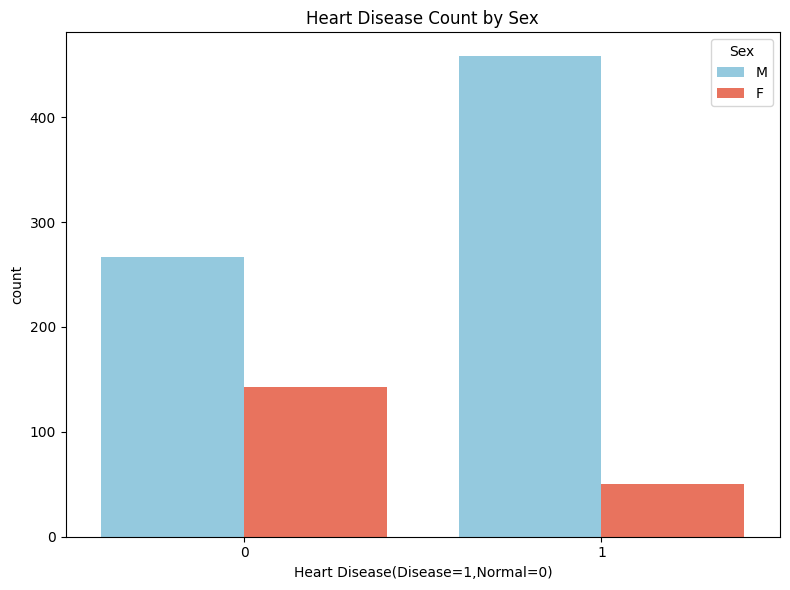

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x="HeartDisease",data=df,hue="Sex",palette=["skyblue", "tomato"])
plt.title("Heart Disease Count by Sex")
plt.xlabel("Heart Disease(Disease=1,Normal=0)")
plt.tight_layout()
plt.show()

## Numerical Feature Distibution

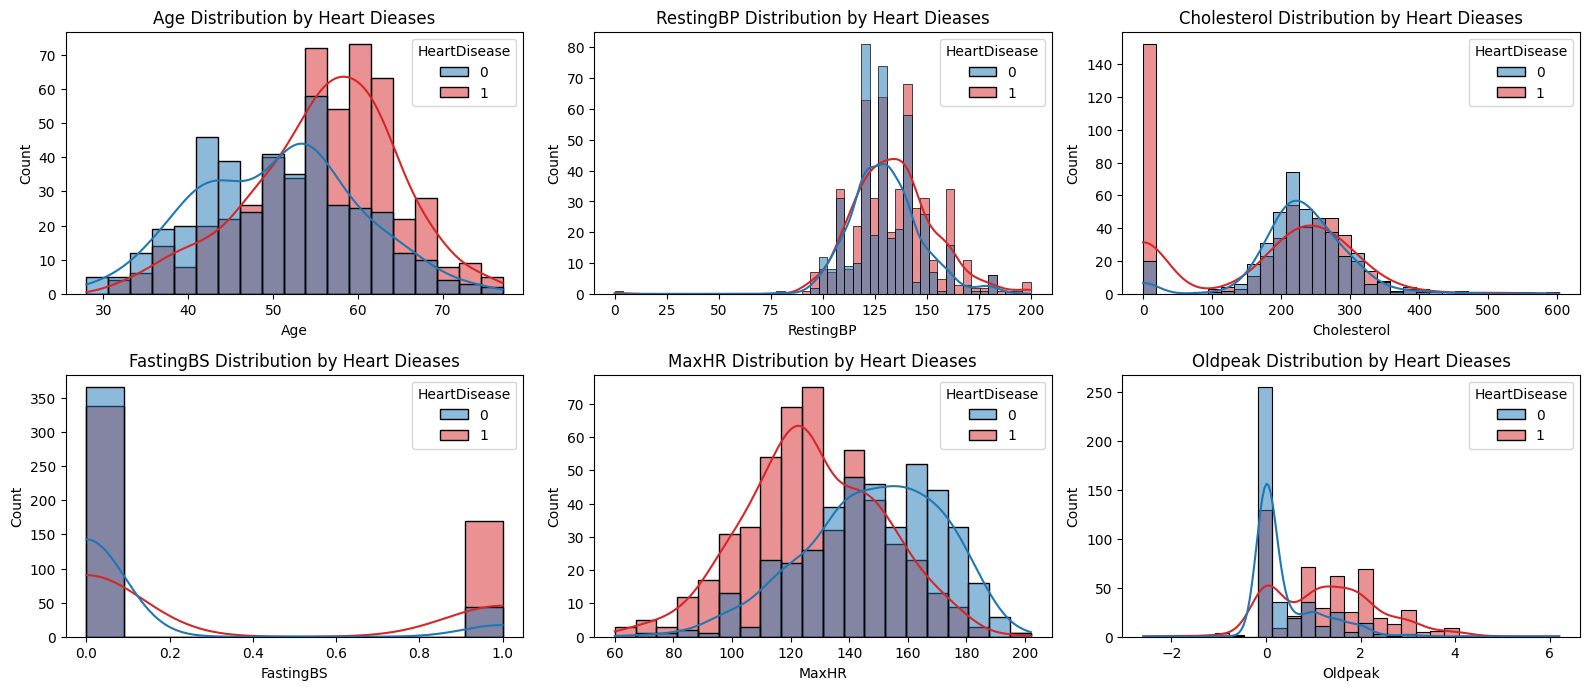

In [6]:
#numeric_features=df.select_dtypes(include=['int64','float64']).columns or
numeric_features=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
plt.figure(figsize=(16,10))
palette_colors = {
    0: "#1f77b4",   # soft blue
    1: "#d62728"    # soft red
}
for i,col in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.histplot(data=df,x=col,kde=True,hue="HeartDisease",palette=palette_colors)
  plt.title(f"{col} Distribution by Heart Dieases")
plt.tight_layout()
plt.show()



##Check Outliers from Numerical Features with Box Plot

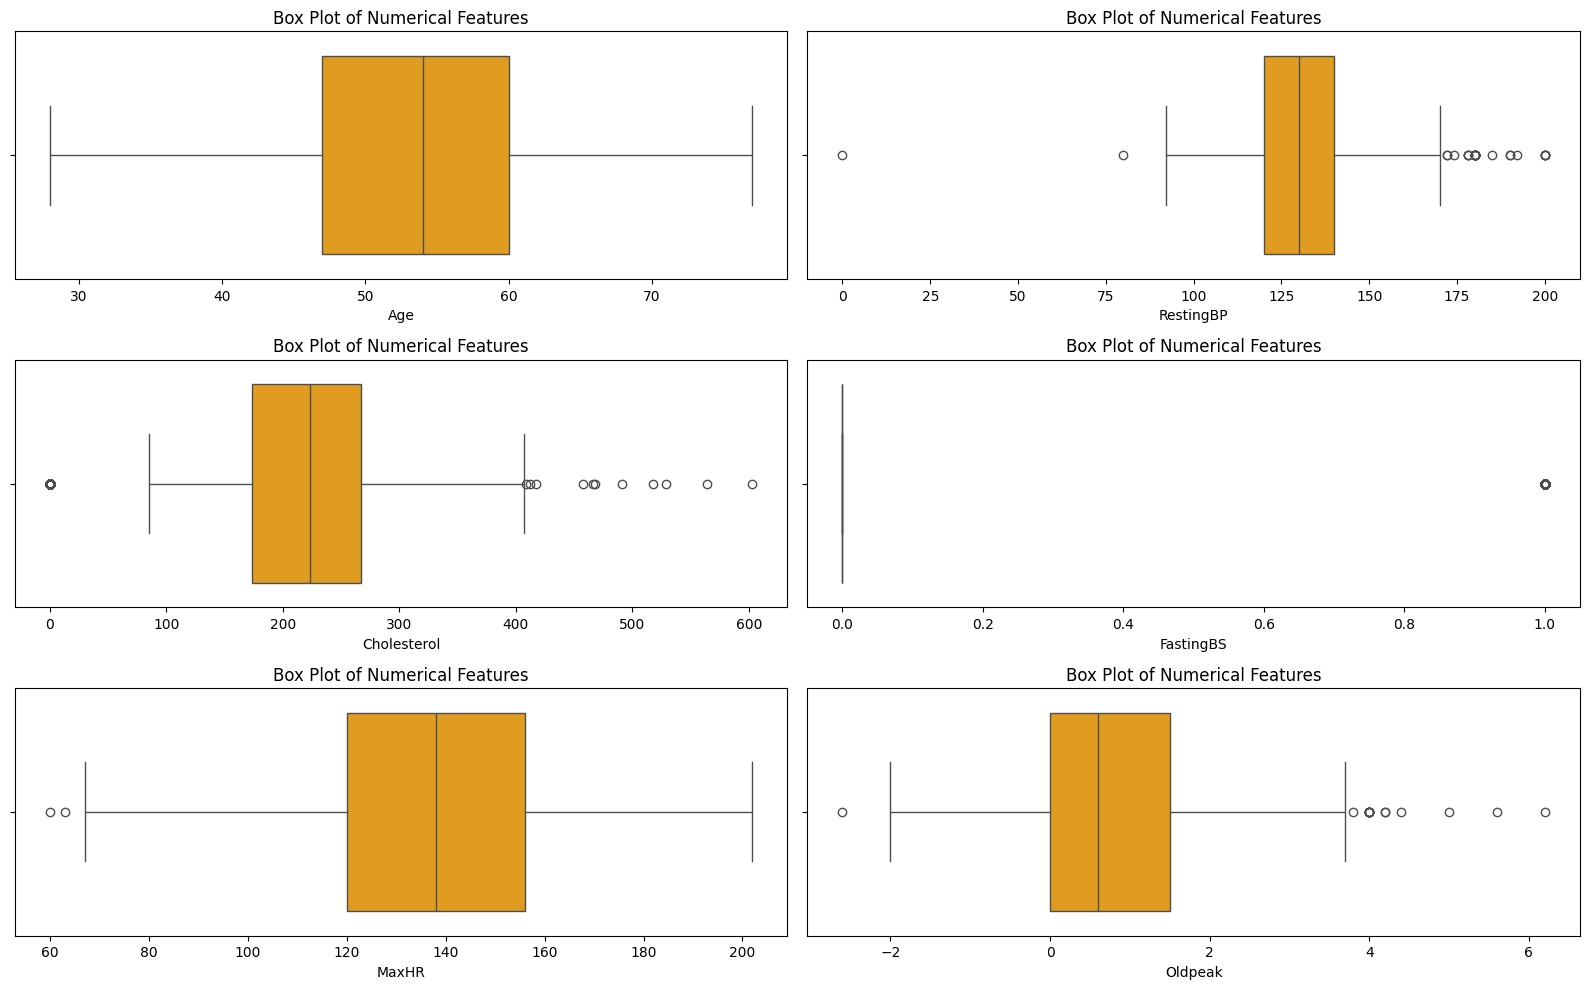

In [7]:

plt.figure(figsize=(16,10))
for i,col in enumerate(numeric_features):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=df,x=col,color="orange")
  plt.title("Box Plot of Numerical Features")
plt.tight_layout()
plt.show()


## Relationship between Features and Target

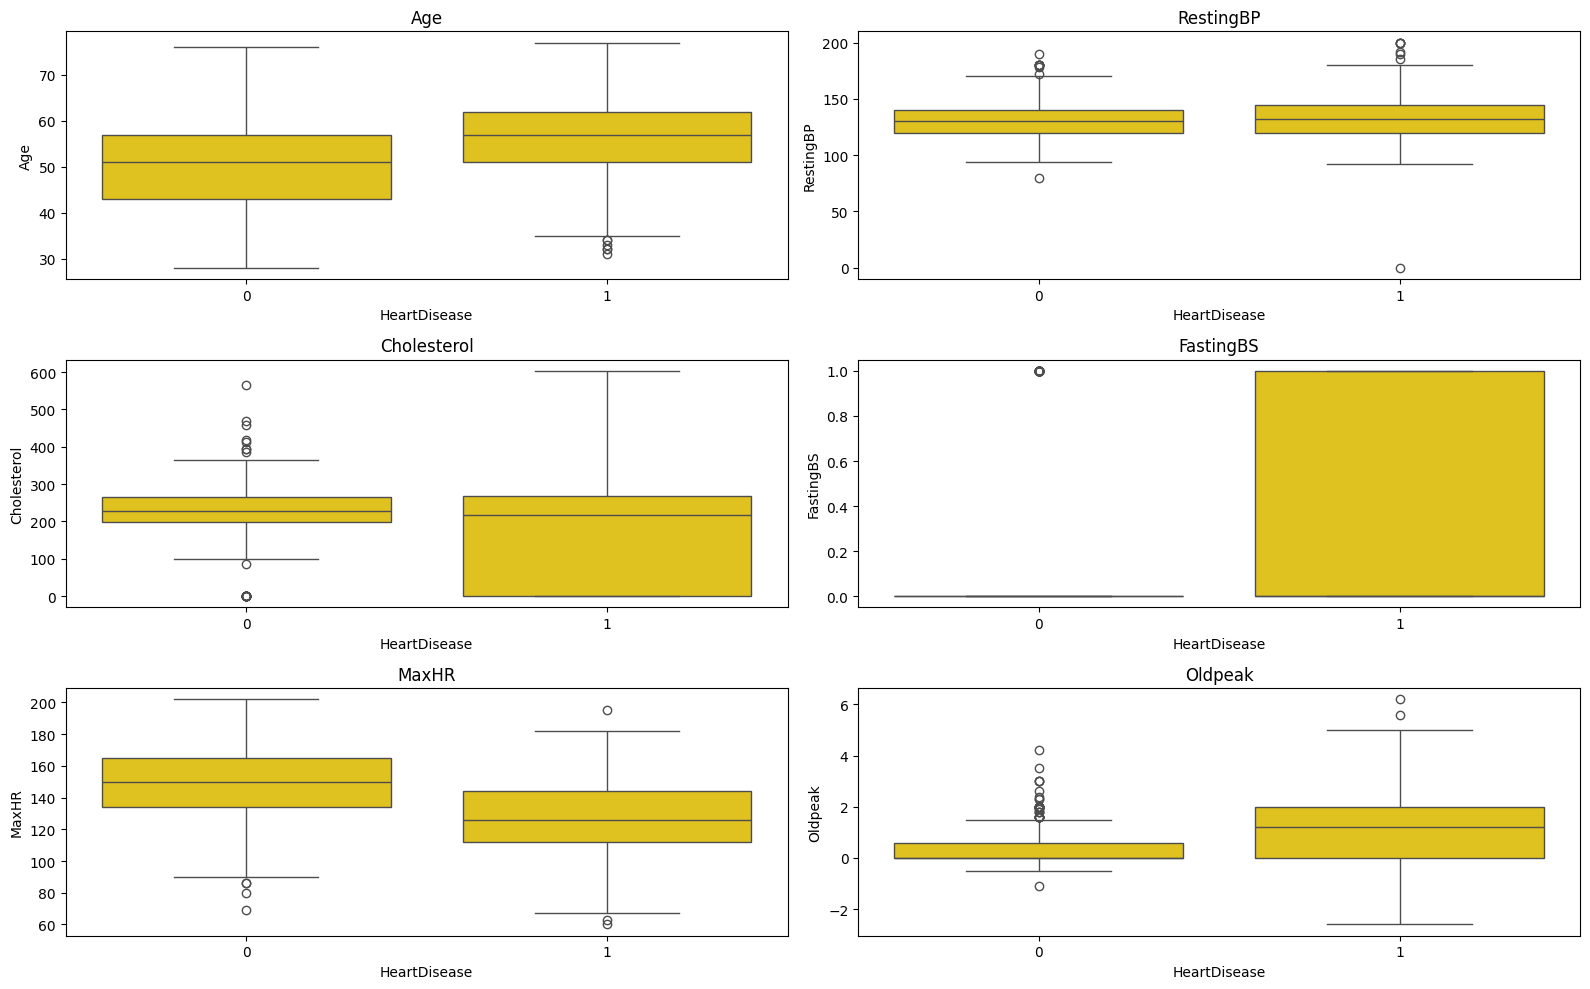

In [8]:
target_col=df["HeartDisease"]
plt.figure(figsize=(16,10))
for i,col in enumerate(numeric_features):
  plt.subplot(3,2,i+1)
  sns.boxplot(x=target_col,y=df[col],data=df,color="gold")
  plt.title(col)
plt.tight_layout()
plt.show()


## Check Categorical feature with Histogram


Propotion of HeartDisease by Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


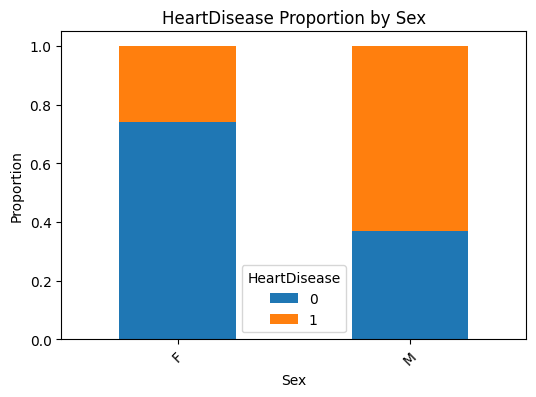


Propotion of HeartDisease by ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


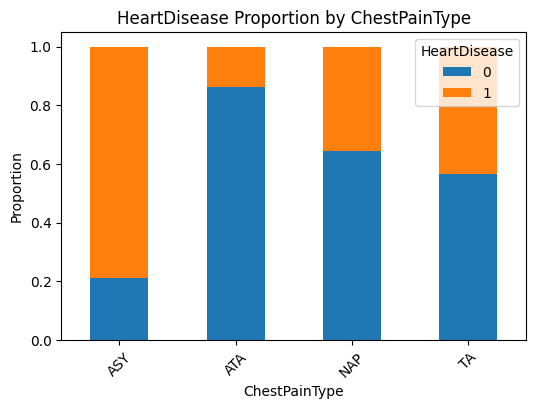


Propotion of HeartDisease by RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


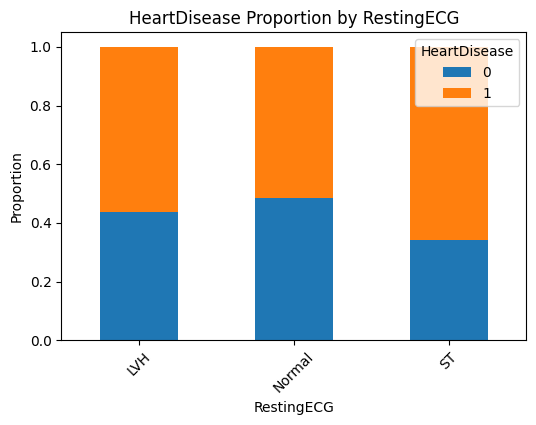


Propotion of HeartDisease by ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


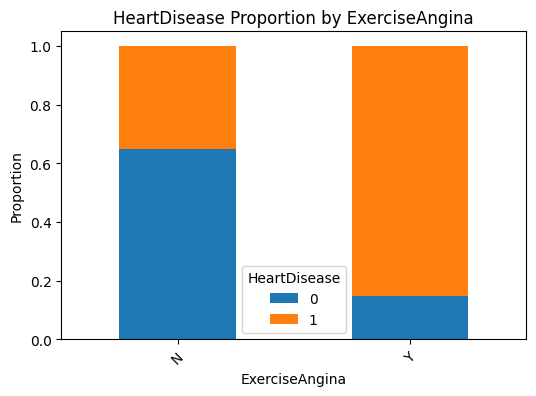

In [9]:
target_col = "HeartDisease"
categorical_features=["Sex","ChestPainType","RestingECG","ExerciseAngina"]
for c in categorical_features:
  ct=pd.crosstab(df[c], df[target_col], normalize="index")
  print(f"\nPropotion of HeartDisease by {c}")
  display(ct)
  ct.plot(kind="bar",stacked=True,figsize=(6,4))
  plt.title(f"HeartDisease Proportion by {c}")
  plt.xlabel(c)
  plt.xticks(rotation=45)
  plt.ylabel("Proportion")
  plt.show()

## Pairplot for a subset of features

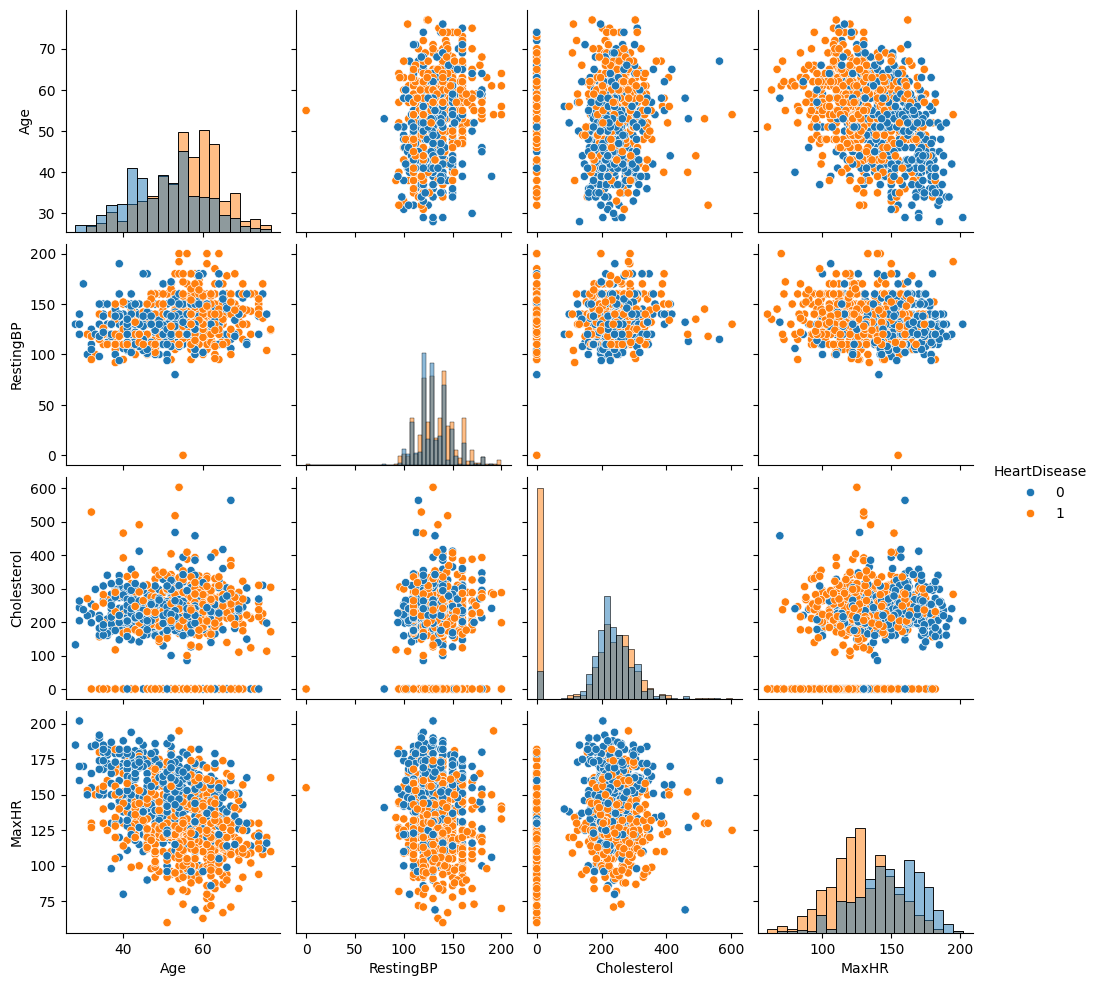

In [10]:
sns.pairplot(df[["Age","RestingBP","Cholesterol","MaxHR","HeartDisease"]],hue="HeartDisease",diag_kind="hist")
plt.show()#'hist', 'kde', 'auto', or None

## Correlation Matrix (Heatmap)

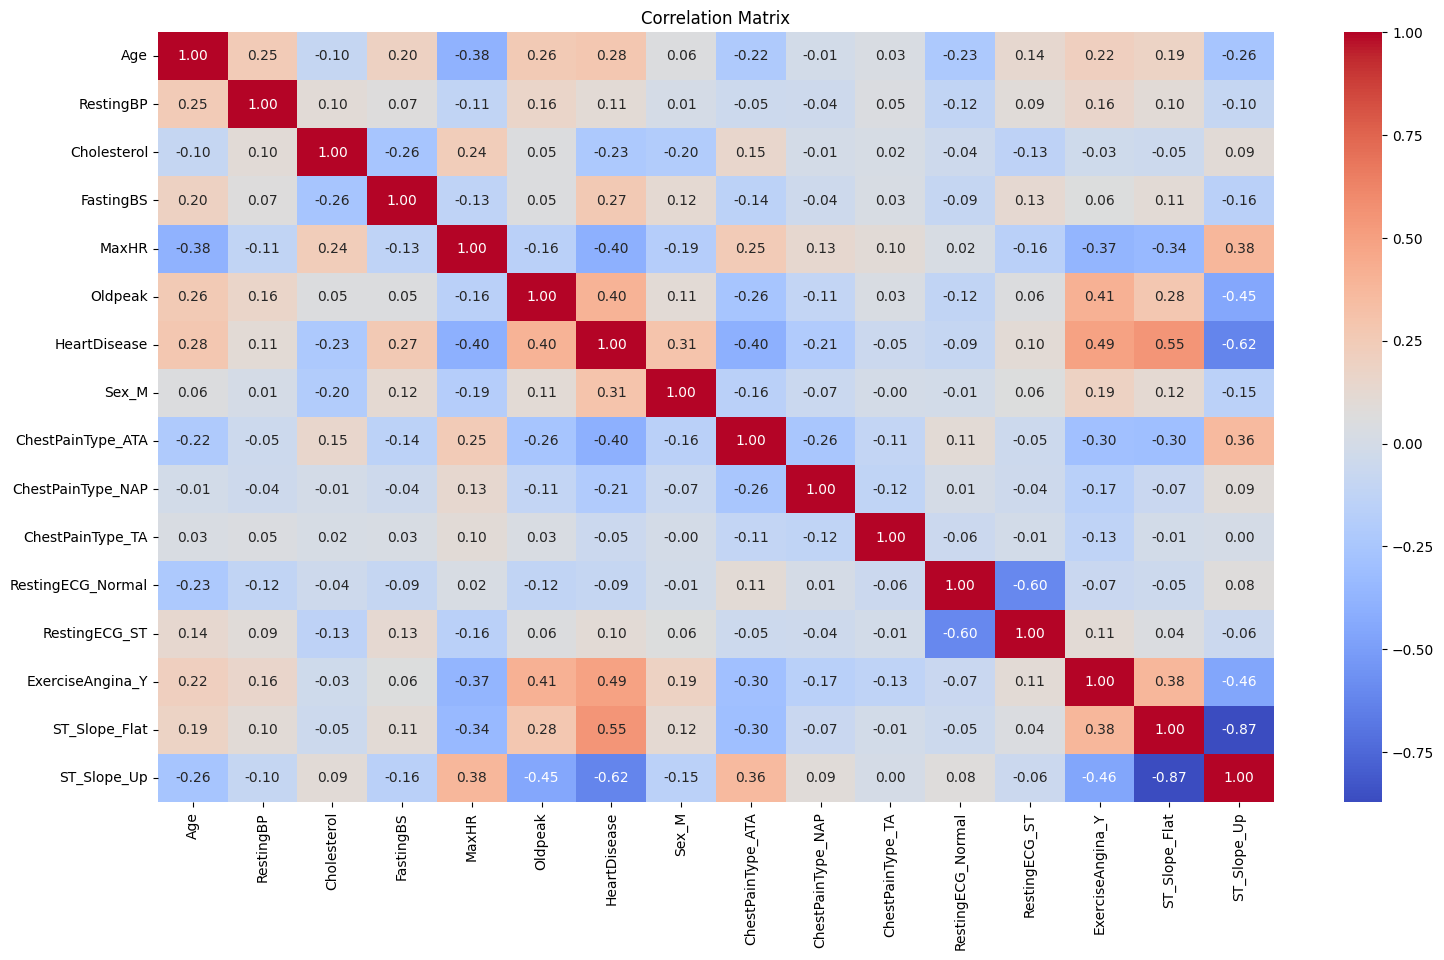

In [11]:
heatmap_data=pd.get_dummies(df,drop_first=True)
plt.figure(figsize=(18,10))
sns.heatmap(heatmap_data.corr(),annot=True,cmap="coolwarm",fmt='0.2f')
plt.title("Correlation Matrix")
plt.show()

## Preprocessing

In [12]:
#------- Preprocessing -------
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
#1. Identify column types
binary_cols=["Sex","ExerciseAngina","FastingBS"]
categorical_cols=["ST_Slope","RestingECG","ChestPainType"]
numeric_cols=["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]

#2. Encode Binary Columns(Label Enoding) #Unique value 2
df["Sex"] = df["Sex"].map({"F": 0, "M": 1})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"N": 0, "Y": 1})
# FastingBS is already 0/1 in this dataset, so no mapping needed

#3. One-Hot Encoding for Categorical Columns #Unique value more than 2
if all(col in df.columns for col in categorical_cols):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
#print(df)

#4. Convert "bool" types (from get_dummies) to int
bool_cols=df.select_dtypes(include="bool").columns.tolist()
df[bool_cols]=df[bool_cols].astype(int)
#print(df[bool_cols])

#5. Clean Column Names (Remove whitespace)
df.columns=df.columns.str.strip()

#6. Separate features (X) and target (Y)
X=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]
#print(X,y)

#7. Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#print(X_train)

#8.Scale Numerical Columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
#print(X_train_scaled)

#Revert NumPy array to DataFrame(For remove LightGBM)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test  = pd.DataFrame(X_test_scaled,  columns=X.columns, index=X_test.index)
#print(X_train)


#Print Shapes
print(f"Data successfully split into:")
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")
print("Data is ready for modeling.")

Data successfully split into:
X_train Shape: (734, 18)
y_train Shape: (734,)
X_test Shape: (184, 18)
y_test Shape: (184,)
Data is ready for modeling.


## Apply Logistic Regression

In [13]:

from sklearn.metrics import classification_report, confusion_matrix

#Logistic Regression
from sklearn.linear_model import LogisticRegression
print("---1.Logistic Regression---")
model_logistic_reg=LogisticRegression(max_iter=1000)
model_logistic_reg.fit(X_train,y_train)

print(f"Train Accuracy:{model_logistic_reg.score(X_train,y_train)*100:.2f}%")
print(f"Test Accuracy:{model_logistic_reg.score(X_test,y_test)*100:.2f}%")

y_pred = model_logistic_reg.predict(X_test)
y_prob = model_logistic_reg.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



---1.Logistic Regression---
Train Accuracy:87.33%
Test Accuracy:85.33%
[[67 10]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



[[67 10]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



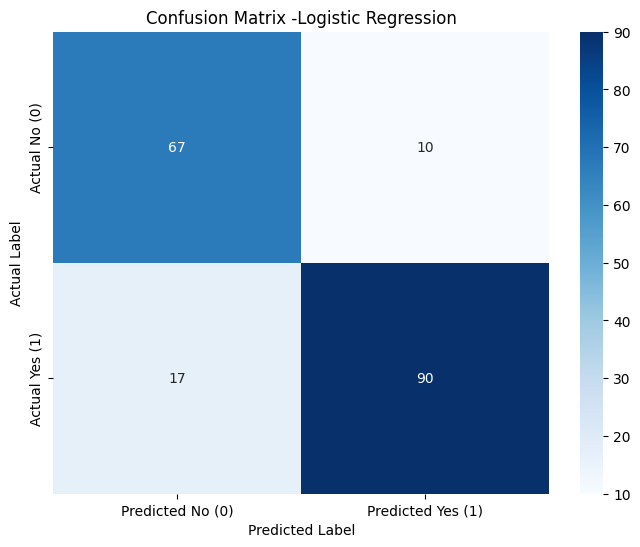

In [14]:
plt.figure(figsize=(8, 6))
y_pred =model_logistic_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm_gb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No (0)', 'Predicted Yes (1)'],
            yticklabels=['Actual No (0)','Actual Yes (1)'])
plt.title('Confusion Matrix -Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

ROC–AUC SCORE,

ROC–AUC Score: 0.927


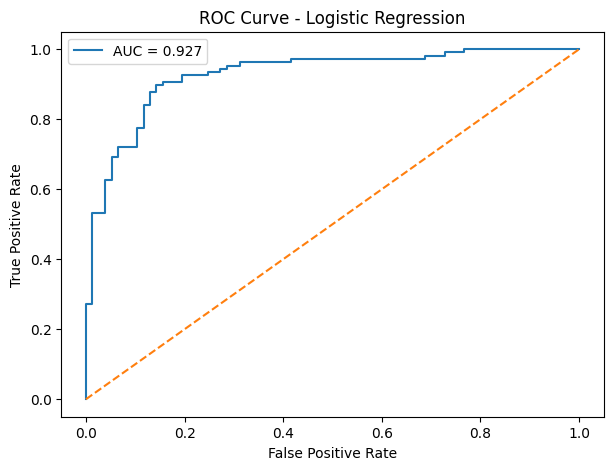

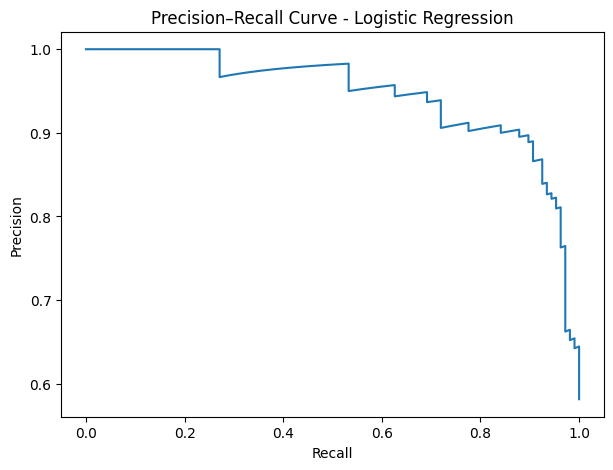

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
#ROC–AUC SCORE
auc = roc_auc_score(y_test, y_prob)
print(f"ROC–AUC Score: {auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Precision–Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Logistic Regression")
plt.show()

## Sample predictions (actual vs predicted + probability scores)

In [16]:
# Sample Predictions Table
sample_df = pd.DataFrame({
    "Actual": y_test[:20].values,                     # first 20 actual values
    "Predicted": y_pred[:20],                         # predicted classes
    "Probability (Yes)": y_prob[:20]                  # predicted probabilities
})

print("\n Sample Predictions (first 20)")
print(sample_df)


 Sample Predictions (first 20)
    Actual  Predicted  Probability (Yes)
0        0          0           0.018847
1        1          0           0.144002
2        1          1           0.978197
3        1          1           0.982895
4        0          0           0.035218
5        1          1           0.898097
6        1          1           0.873155
7        0          0           0.082316
8        1          1           0.804625
9        1          1           0.953745
10       0          1           0.751865
11       0          0           0.092398
12       0          1           0.637223
13       0          0           0.067153
14       1          1           0.934637
15       1          1           0.764435
16       0          0           0.013739
17       1          1           0.883653
18       1          1           0.808004
19       0          0           0.088905
